# Using Advertising Dataset

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn

## Importing data from csv file

In [3]:
advertise_data = pd.read_csv("advertising.csv")

# Overview of the data

In [4]:
advertise_data.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [5]:
advertise_data.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [21]:
advertise_data["Total"] = advertise_data["TV"] + advertise_data["radio"] + advertise_data["newspaper"]
advertise_data.head()

,TV,radio,newspaper,sales,Total
0,230.1,37.8,69.2,22.1,337.1
1,44.5,39.3,45.1,10.4,128.9
2,17.2,45.9,69.3,9.3,132.4
3,151.5,41.3,58.5,18.5,251.3
4,180.8,10.8,58.4,12.9,250.0


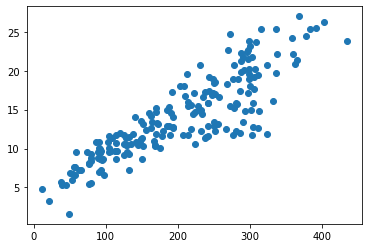

In [25]:
plt.scatter(advertise_data["Total"], advertise_data["sales"]);

In [32]:
a, b = np.polyfit(x=advertise_data["Total"],y=advertise_data["sales"], deg=1)

In [34]:
def funLinear(x):
    return (a * x) + b

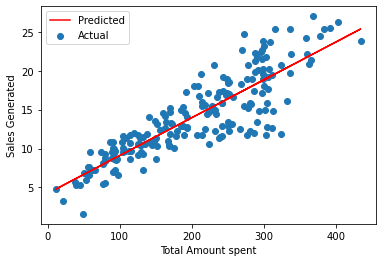

In [50]:
plt.scatter(advertise_data["Total"], advertise_data["sales"]);

predicted = []

for i in advertise_data["Total"]:
    predicted.append(funLinear(i))
  

plt.plot(advertise_data["Total"], predicted, color="red")

plt.xlabel("Total Amount spent")
plt.ylabel("Sales Generated")

plt.legend(["Predicted", "Actual"])
plt.show()

In [45]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(advertise_data, test_size = 0.3)

In [71]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
maes = []
mses = []
r2s = []
for i in range(1, 11):
    print(f"Using degree of {i}")
    x_train = train.drop("sales", axis=1)
    y_train = train["sales"]

    x_test = train.drop("sales", axis=1)
    y_test = train["sales"]

    poly_reg = PolynomialFeatures(degree=i)
    poly_x = poly_reg.fit_transform(x_train)
    poly_regression = LinearRegression()
    poly_regression.fit(poly_x, y_train)

    poly_test_x = poly_reg.fit_transform(x_test)
    y_preds = poly_regression.predict(poly_test_x)
    mae = mean_absolute_error(y_test, y_preds)
    mse = mean_squared_error(y_test, y_preds)
    r2 = r2_score(y_test, y_preds)
    maes.append(mae)
    mses.append(mse)
    r2s.append(r2)
    print(f"Mae : {mae}\nMse : {mse}\nR2 Score: {r2}\n")

Using degree of 1
Mae : 1.289823043314588
Mse : 2.9969610960697373
R2 Score: 0.8989246195045866

Using degree of 2
Mae : 0.42422405902332816
Mse : 0.37809080480810175
R2 Score: 0.9872485258457601

Using degree of 3
Mae : 0.3319950877891025
Mse : 0.2136248452873087
R2 Score: 0.9927952976937189

Using degree of 4
Mae : 0.25959516095932855
Mse : 0.1204319356108854
R2 Score: 0.9959383177407165

Using degree of 5
Mae : 0.19222081402476268
Mse : 0.06440367376262862
R2 Score: 0.9978279244801018

Using degree of 6
Mae : 0.22491674511455198
Mse : 0.08174529808983821
R2 Score: 0.9972430616069802

Using degree of 7
Mae : 0.1398329857557586
Mse : 0.03865922020784616
R2 Score: 0.9986961808088572

Using degree of 8
Mae : 0.16121503706737592
Mse : 0.0545163732728376
R2 Score: 0.9981613831494148

Using degree of 9
Mae : 0.21215377847234967
Mse : 0.10392571888595237
R2 Score: 0.9964950056931228

Using degree of 10
Mae : 0.15982662591801525
Mse : 0.09604110260844102
R2 Score: 0.9967609219211829



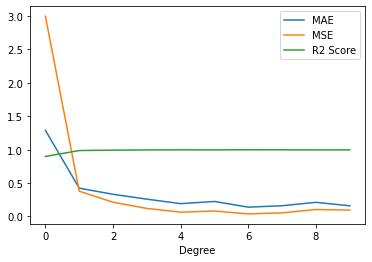

In [76]:
plt.plot(maes)
plt.plot(mses)
plt.plot(r2s)
plt.legend(["MAE","MSE","R2 Score"])
plt.xlabel("Degree")
plt.show()